# Title of the project ;  IPL Data Analysis

## Name ; SIVANAND S

## Organization ; Entri Elevate

## Date ; 28/05/2024

####  Overview of the problem statement ;

##### The player lifetime dataset offers a comprehensive view of players participating in the Indian Premier League, including their career statistics, performance and various attributes relevant to their roles within the league.

####  Objective ;

##### Objective is to analyze the trend of runs scored by players over different years in the IPL.



####  Data Description

#### -Source ; 

### Kaggle

#### -Features ;

##### Year, Player_Name, Matches_Batted, Not_Outs, Runs_Scored, Highest_Score, Batting_Average, Balls_Faced, Batting_Strike_Rate, Centuries, Half_Centuries, Fours, Sixes, Catches_Taken, Stumpings, Matches_Bowled, Balls_Bowled, Runs_Conceded, Wickets_Taken, Best_Bowling_Match, Bowling_Average, Economy_Rate, Bowling_Strike_Rate, Four_Wicket_Hauls, Five_Wicket_Hauls

####  Data Collection

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
player_ipl=pd.read_csv("cricket_data.csv")
player_ipl

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,Mayank Markande,2,0,0,0,0,0,0,0,...,2,42,57,1,1/26,57.00,8.14,42.00,0,0
1168,2021,Mayank Markande,1,0,0,0,0.00,0,0.00,0,...,1,18,26,0,0/26,0,8.66,0,0,0
1169,2019,Mayank Markande,3,1,6,6,6.00,5,120.00,0,...,3,36,59,1,1/23,59.00,9.83,36.00,0,0
1170,2018,Mayank Markande,14,4,21,7*,10.50,24,87.50,0,...,14,264,368,15,4/23,24.53,8.36,17.60,1,0


 ####  Data Preprocessing

In [3]:
def preprocess_data(player_ipl):
    # Check data types
    print(player_ipl.dtypes)
    
    # Convert columns to numeric types if they are not already
    numeric_columns = ['Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Matches_Bowled']
    
    for column in numeric_columns:
        player_ipl[column] = pd.to_numeric(player_ipl[column], errors='coerce')
    
    # Replace "No stats" with NaN in the column where it occurs
    player_ipl.replace("No stats", np.nan, inplace=True)
    
    # Now describe the DataFrame again
    print(player_ipl.describe(include=[np.number]))
    
    return player_ipl


player_ipl = preprocess_data(player_ipl)

Year                   object
Player_Name            object
Matches_Batted         object
Not_Outs               object
Runs_Scored            object
Highest_Score          object
Batting_Average        object
Balls_Faced            object
Batting_Strike_Rate    object
Centuries              object
Half_Centuries         object
Fours                  object
Sixes                  object
Catches_Taken          object
Stumpings              object
Matches_Bowled         object
Balls_Bowled           object
Runs_Conceded          object
Wickets_Taken          object
Best_Bowling_Match     object
Bowling_Average        object
Economy_Rate           object
Bowling_Strike_Rate    object
Four_Wicket_Hauls      object
Five_Wicket_Hauls      object
dtype: object
       Matches_Batted     Not_Outs  Runs_Scored  Highest_Score  \
count     1131.000000  1131.000000  1131.000000     701.000000   
mean         9.008842     1.486295   132.136163      31.393723   
std          5.531560     1.697092   1

In [4]:
columns_to_fill = ['Runs_Scored', 'Year', 'Matches_Batted', 'Highest_Score', 'Not_Outs', 'Batting_Average',
                   'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
                   'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
                   'Wickets_Taken', 'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate',
                   'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']

for column in columns_to_fill:
    player_ipl[column].fillna(0, inplace=True)

In [5]:
player_ipl.isnull().sum()

Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64

In [6]:
#calculation of first quartile
q1=player_ipl["Runs_Scored"].quantile(0.25)
q1

3.0

In [7]:
#calculation of third quartile
q3=player_ipl["Runs_Scored"].quantile(0.75)
q3

218.25

In [8]:
#calculation of IQR
iqr=q3-q1
iqr

215.25

In [9]:
#lower and upper bound outlier detection

lower_bound=q1-1.5*iqr
lower_bound

-319.875

In [10]:
upper_bound=q3+1.5*iqr
upper_bound

541.125

In [11]:
#detection of outliers
outliers_iqr=player_ipl[(player_ipl["Runs_Scored"]<lower_bound)|(player_ipl["Runs_Scored"]>upper_bound)]

In [12]:
#removal of outliers
cleaned_iqr=player_ipl[~player_ipl["Runs_Scored"].isin(outliers_iqr["Runs_Scored"])]

In [13]:
#printing number of outliers detected
print("Outliers Detected Using IQR Method ; " ,len(outliers_iqr))

Outliers Detected Using IQR Method ;  31


In [14]:
# Calculate skewness for numerical columns
skewness = player_ipl[['Runs_Scored', 'Highest_Score']].skew()
print("Skewness:")
print(skewness)

Skewness:
Runs_Scored      1.498520
Highest_Score    1.496872
dtype: float64


#### IQR (Interquartile Range) Outlier Detection:

###### First quartile (Q1), third quartile (Q3), and IQR are calculated for the "Runs_Scored" column.Lower and upper bounds for outlier detection are determined using the IQR method.Outliers are identified based on values falling below the lower bound or above the upper bound.

#### Skewness Calculation:

###### Skewness values are calculated for the columns "Runs_Scored" and "Highest_Score".Skewness indicates the asymmetry in the distribution of data. Positive skewness implies a tail on the right side of the distribution, while negative skewness implies a tail on the left side.

#### Outcome:

###### Detected outliers using IQR method.Skewness of numerical columns is assessed.Overall, the script provides a comprehensive overview of outlier detection and skewness assessment, which are essential steps in data preprocessing and analysis.

#### Exploratory Data Analysis

In [15]:
player_ipl.describe() # summary statistics

,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,Matches_Bowled
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,8.693686,1.434300,127.513652,18.777304,16.817679,95.103242,98.648413,0.040956,8.725256
std,5.680584,1.689355,169.756421,28.486515,16.552084,121.853079,61.149197,0.264679,5.671745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,0.000000,0.000000,5.000000,53.712500,0.000000,3.000000
50%,9.000000,1.000000,38.000000,0.000000,13.625000,32.500000,116.665000,0.000000,10.000000
75%,14.000000,2.000000,218.250000,31.000000,27.777500,162.000000,139.060000,0.000000,14.000000
max,19.000000,10.000000,973.000000,129.000000,101.000000,640.000000,400.000000,4.000000,19.000000


In [16]:
player_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1172 non-null   object 
 1   Player_Name          1172 non-null   object 
 2   Matches_Batted       1172 non-null   float64
 3   Not_Outs             1172 non-null   float64
 4   Runs_Scored          1172 non-null   float64
 5   Highest_Score        1172 non-null   float64
 6   Batting_Average      1172 non-null   float64
 7   Balls_Faced          1172 non-null   float64
 8   Batting_Strike_Rate  1172 non-null   float64
 9   Centuries            1172 non-null   float64
 10  Half_Centuries       1172 non-null   object 
 11  Fours                1172 non-null   object 
 12  Sixes                1172 non-null   object 
 13  Catches_Taken        1172 non-null   object 
 14  Stumpings            1172 non-null   object 
 15  Matches_Bowled       1172 non-null   f

In [17]:
# Unique Values
player_ipl["Player_Name"].unique()

array(['Ruturaj Gaikwad', 'Devon Conway', 'MS Dhoni', 'Ajinkya Rahane',
       'Shaik Rasheed', 'Sameer Rizvi', 'Avanish Rao Aravelly',
       'Ravindra Jadeja', 'Mitchell Santner', 'Moeen Ali', 'Shivam Dube',
       'Nishant Sindhu', 'Ajay Mandal', 'Rachin Ravindra',
       'Shardul Thakur', 'Daryl Mitchell', 'Rajvardhan Hangargekar',
       'Deepak Chahar', 'Maheesh Theekshana', 'Mukesh Choudhary',
       'Mustafizur Rahman', 'Prashant Solanki', 'Simarjeet Singh',
       'Tushar Deshpande', 'Matheesha Pathirana', 'Rishabh Pant',
       'David Warner', 'Prithvi Shaw', 'Yash Dhull', 'Shai Hope',
       'Swastik Chhikara', 'Abishek Porel', 'Harry Brook', 'Ricky Bhui',
       'Kumar Kushagra', 'Tristan Stubbs', 'Axar Patel', 'Lalit Yadav',
       'Mitchell Marsh', 'Sumit Kumar', 'Pravin Dubey', 'Vicky Ostwal',
       'Anrich Nortje', 'Kuldeep Yadav', 'Jake Fraser-McGurk',
       'Khaleel Ahmed', 'Ishant Sharma', 'Jhye Richardson',
       'Mukesh Kumar', 'Rasikh Dar', 'Shubman Gill', 'Dav

In [18]:
player_ipl["Highest_Score"].unique()

array([ 46.,  92.,  99.,   0.,  72.,  87.,  53.,  65.,  27.,  44.,   8.,
        60.,  74.,  52.,   4.,  50.,  28.,  24.,  48.,  47.,  42.,  11.,
        22.,  23.,  93.,  58.,  66.,  68.,  17.,   7.,  39.,  14.,   1.,
        18.,  56.,  97.,  69.,  29.,  86.,  57., 126.,  91.,  90.,  77.,
        51.,  54.,  61.,  82.,  13.,  33.,  20.,   3.,   5.,   2.,  21.,
        12.,  26.,  19.,  38.,  63.,  89.,  37.,  15.,  16.,   9.,  31.,
       129.,  96.,  76.,  62.,  35.,  81.,   6.,  67.,  84.,  43.,  45.,
        40.,  85.,  83.,  30.,  75.,  80.,  59.,  70.,  94.,  25., 104.,
        64., 108.,  32.,  34.,  49.,  73., 114., 103.,  41.,  55.,  10.,
       119., 102.,  95., 116., 124., 100., 113.,  71.,  78., 106.,  36.])

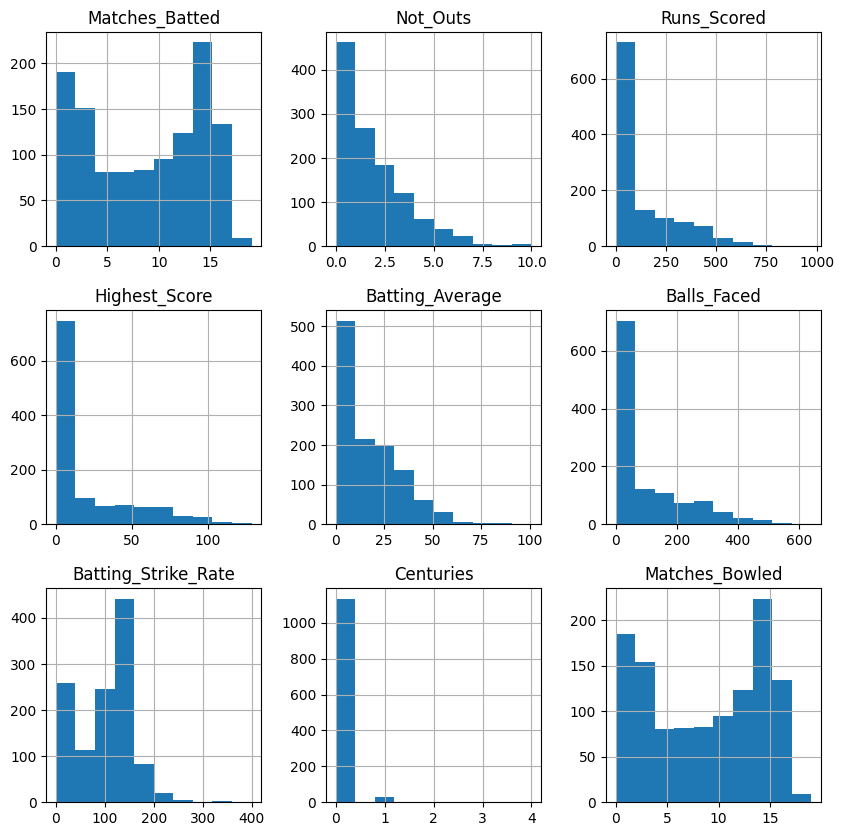

In [19]:
#distribution of feature of summary data
player_ipl.hist(figsize = (10,10))
plt.show()

In [20]:
correlation = player_ipl['Runs_Scored'].corr(player_ipl['Year'])
print("Correlation between Runs_Scored and Year :", correlation)


Correlation between Runs_Scored and Year : 0.1436980844451508


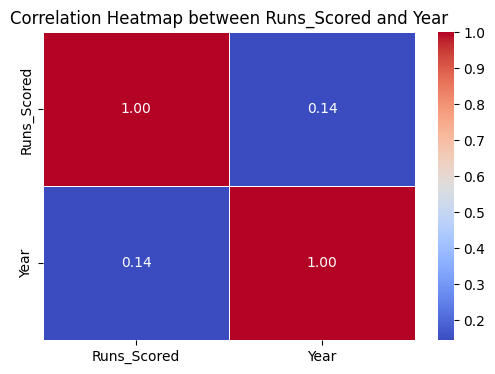

In [21]:
# Compute the correlation matrix for the two columns
corr_matrix = player_ipl[['Runs_Scored', 'Year']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Runs_Scored and Year')
plt.show()



##### The values inside the heatmap cells represent the correlation coefficient between the two variables. The correlation coefficient ranges from -1 to 1, where:
##### 
1 indicates a perfect positive correlation (as one variable increases, the other also increases .
-1 indicates a perfect negative correlation (as one variable increases, the other decrease ).
0 indicates no correlation between the variab

##### The color scale of the heatmap represents the strength and direction of the correlation. In this heatmap:
##### 
Warm colors (e.g., red) represent positive correlations, indicating that as one variable increases, the other tends to increase as wel .
Cool colors (e.g., blue) represent negative correlations, indicating that as one variable increases, the other tends to decreae.
The intensity of the color represents the strength of the correlation, with darker shades indicating stronger correlations.les.


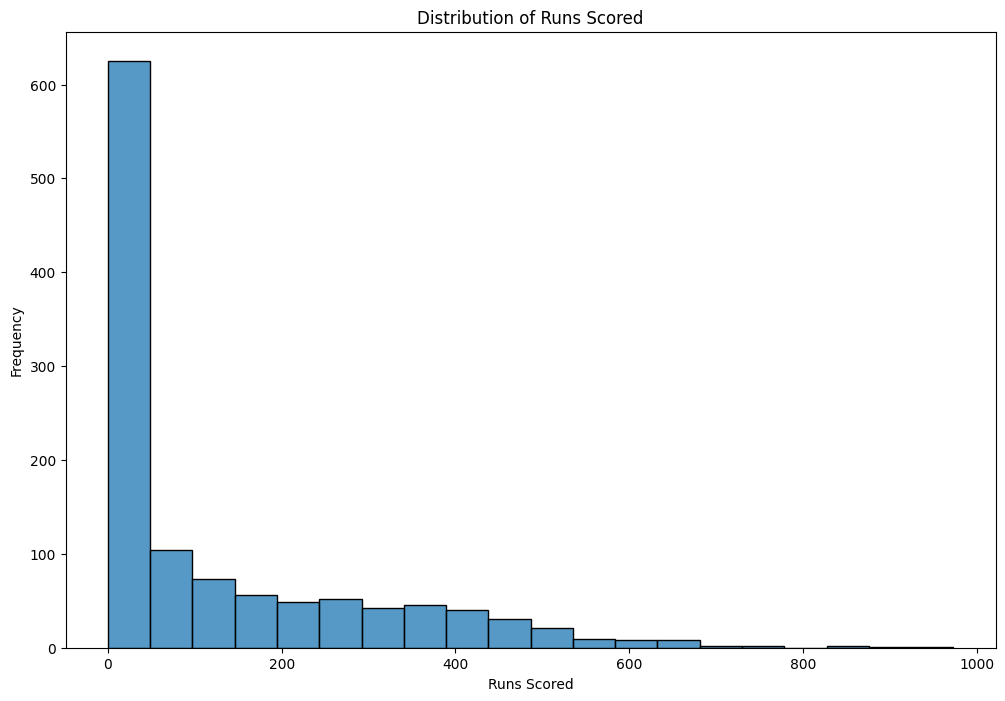

In [22]:

plt.figure(figsize=(12, 8))
sns.histplot(data=player_ipl, x='Runs_Scored', bins=20)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

##### Overall, this histogram offers insights into the distribution pattern of runs scored by players.





In [23]:
top_run_scorers = player_ipl.sort_values(by='Runs_Scored', ascending=False).head(10)
print("Top Run Scorers:\n", top_run_scorers)


Top Run Scorers:
      Year      Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
946  2016      Virat Kohli            16.0       4.0        973.0   
223  2023     Shubman Gill            17.0       2.0        890.0   
816  2022      Jos Buttler            17.0       2.0        863.0   
131  2016     David Warner            17.0       3.0        848.0   
268  2018  Kane Williamson            17.0       3.0        735.0   
924  2023   Faf du Plessis            14.0       1.0        730.0   
129  2019     David Warner            12.0       2.0        692.0   
121  2018     Rishabh Pant            14.0       1.0        684.0   
5    2023     Devon Conway            16.0       2.0        672.0   
471  2020         KL Rahul            14.0       2.0        670.0   

     Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
946          113.0            81.08        640.0               152.03   
223          129.0            59.33        564.0               157.80   
816

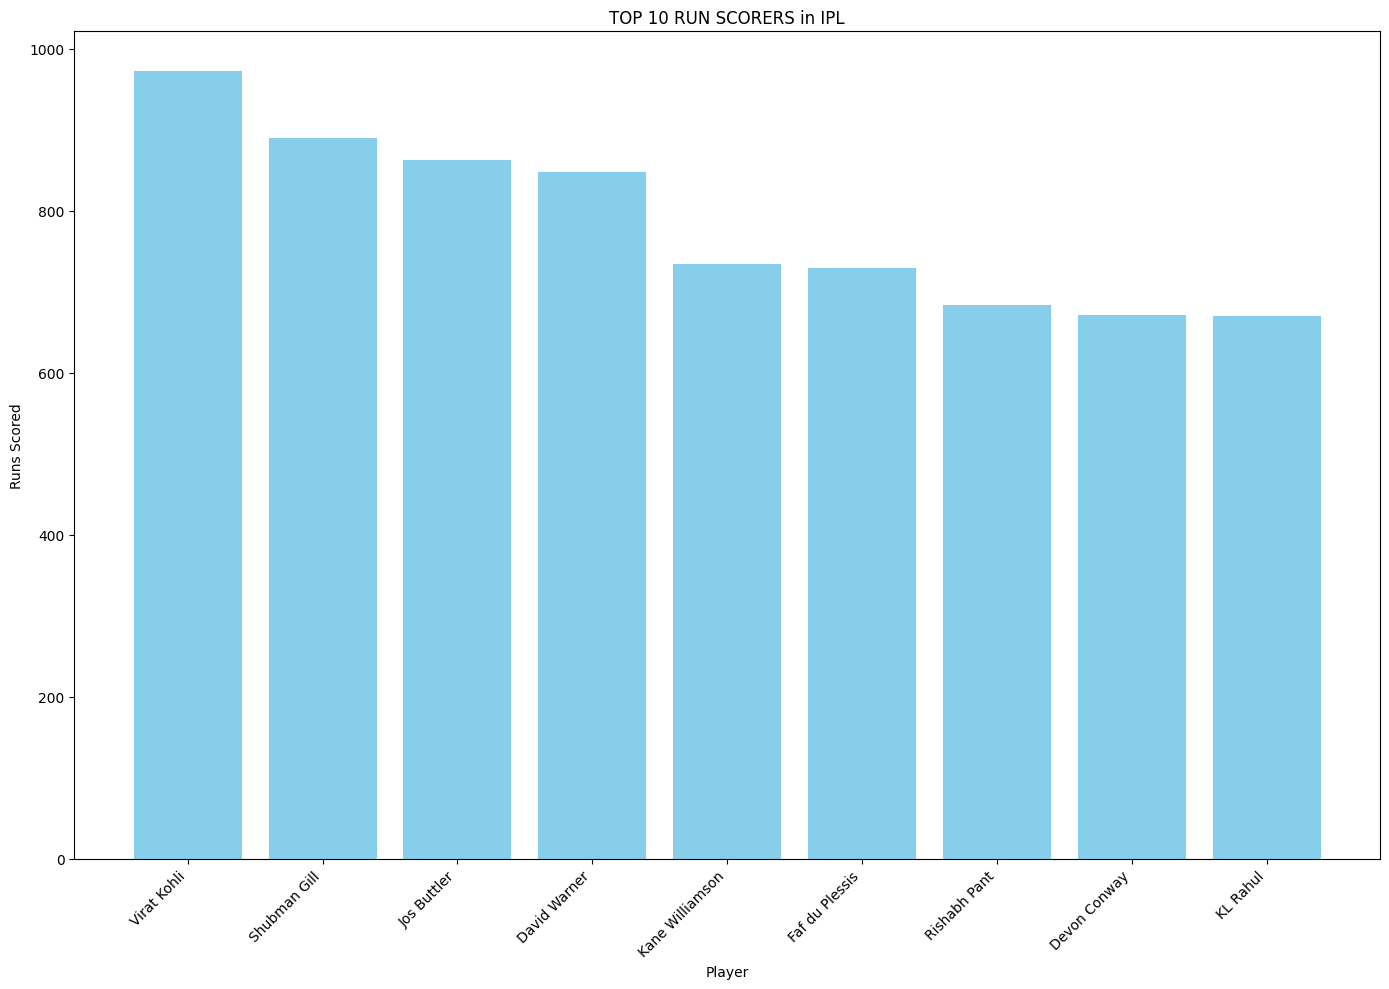

In [24]:
plt.figure(figsize=(14, 10))
plt.bar(top_run_scorers['Player_Name'], top_run_scorers['Runs_Scored'], color='skyblue')
plt.title('TOP 10 RUN SCORERS in IPL')
plt.xlabel('Player')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [25]:
balls_faced = player_ipl.sort_values(by='Balls_Faced', ascending=False).head(10)
print("Balls Faced:\n",balls_faced)


Balls Faced:
      Year      Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
946  2016      Virat Kohli            16.0       4.0        973.0   
816  2022      Jos Buttler            17.0       2.0        863.0   
223  2023     Shubman Gill            17.0       2.0        890.0   
131  2016     David Warner            17.0       3.0        848.0   
471  2020         KL Rahul            14.0       2.0        670.0   
268  2018  Kane Williamson            17.0       3.0        735.0   
5    2023     Devon Conway            16.0       2.0        672.0   
129  2019     David Warner            12.0       2.0        692.0   
924  2023   Faf du Plessis            14.0       1.0        730.0   
697  2021   Shikhar Dhawan            16.0       1.0        587.0   

     Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
946          113.0            81.08        640.0               152.03   
816          116.0            57.53        579.0               149.05   
223    

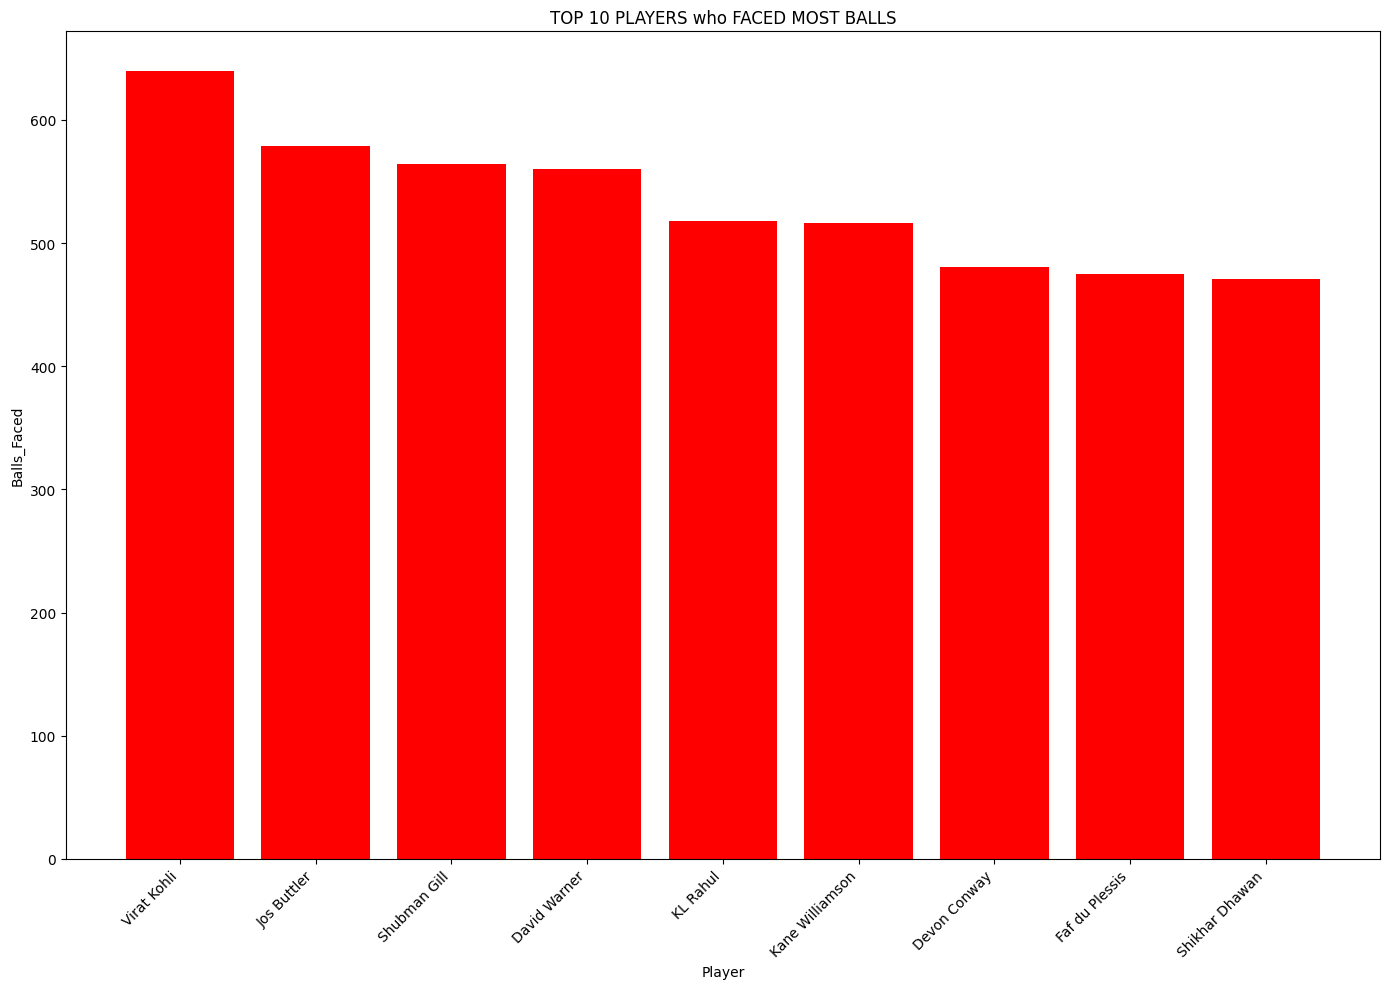

In [26]:
plt.figure(figsize=(14, 10))
plt.bar(balls_faced['Player_Name'], balls_faced['Balls_Faced'], color='red')
plt.title('TOP 10 PLAYERS who FACED MOST BALLS')
plt.xlabel('Player')
plt.ylabel('Balls_Faced')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

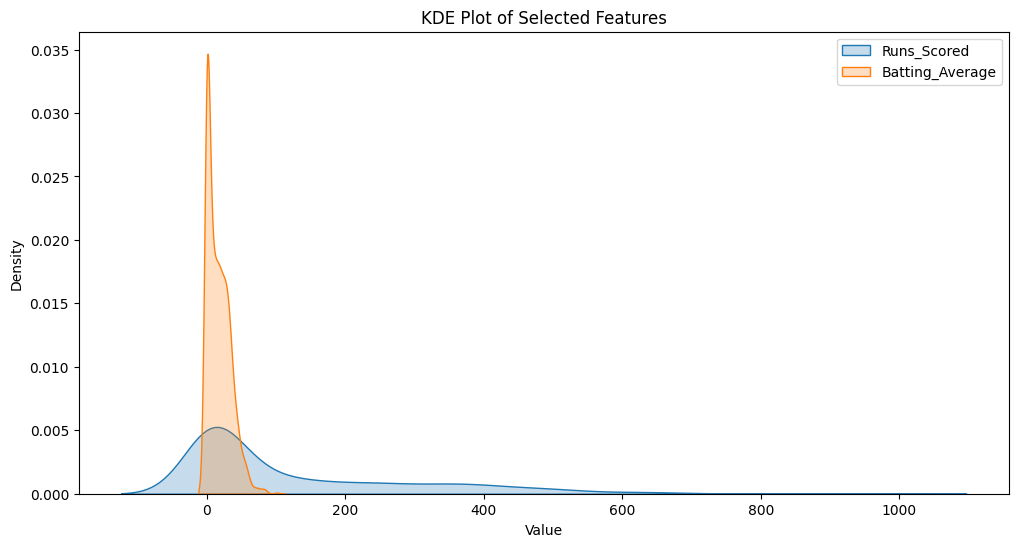

In [27]:
#KDE
# List of columns for which to plot KDE
columns_to_plot = ['Runs_Scored', 'Batting_Average']  # Replace with your columns

# Plot KDE for each column
plt.figure(figsize=(12, 6))

for column in columns_to_plot:
    sns.kdeplot(player_ipl[column], shade=True, label=column)

# Add title and labels
plt.title('KDE Plot of Selected Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

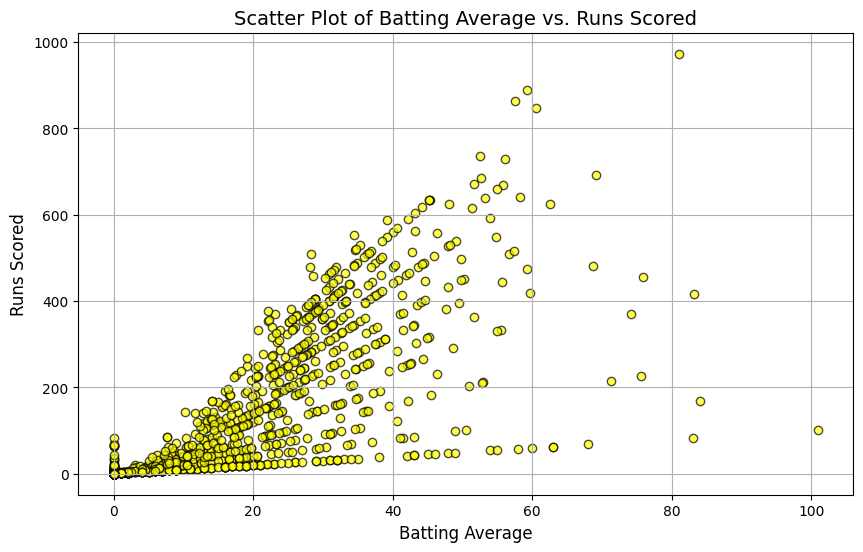

In [28]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot
ax.scatter(player_ipl['Batting_Average'], player_ipl['Runs_Scored'], color='yellow', alpha=0.7, edgecolors='black')

# Set labels and title
ax.set_xlabel('Batting Average', fontsize=12)
ax.set_ylabel('Runs Scored', fontsize=12)
ax.set_title('Scatter Plot of Batting Average vs. Runs Scored', fontsize=14)

# Add grid
ax.grid(True)

# Show plot
plt.show()


##### Overall, the scatter plot helps visualize the relationship between two variables (batting average and runs scored) and can be a useful tool for identifying trends, patterns, and anomalies in the data.

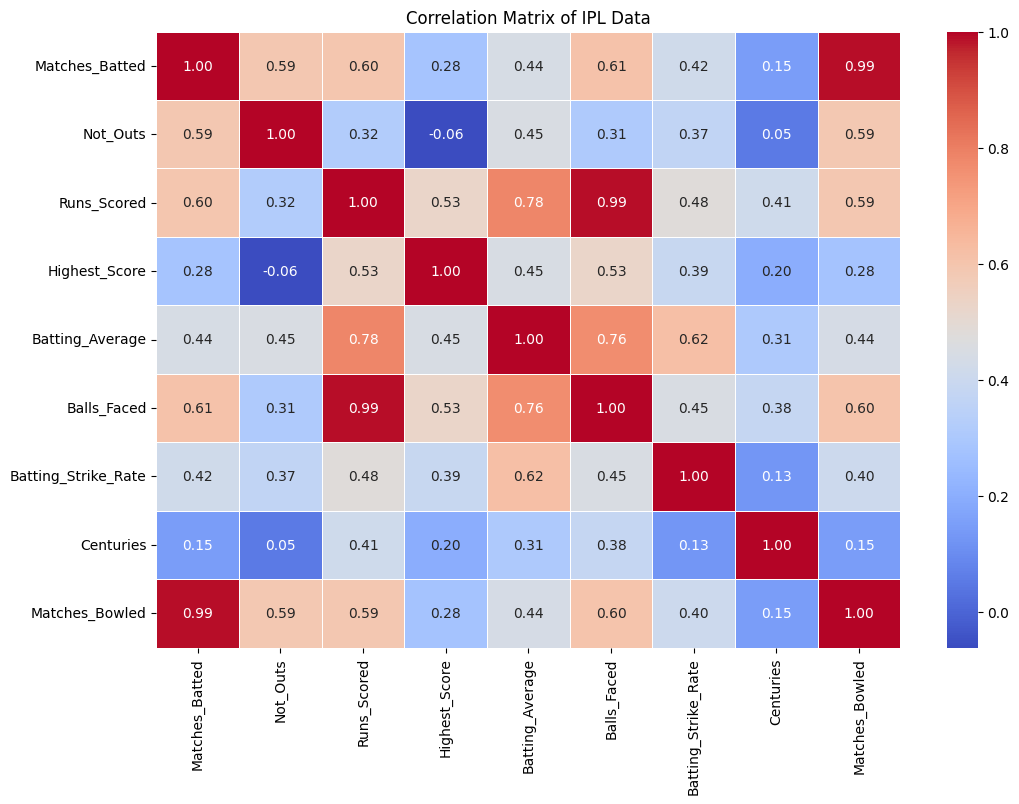

In [29]:
# Exclude non-numeric columns before computing correlation
numeric_data = player_ipl.select_dtypes(include=['int', 'float'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of IPL Data')
plt.show()

#### Diagonal Line: The diagonal line from the top-left to the bottom-right will always have values of 1.0 because each variable is perfectly correlated with itself.Off-Diagonal Values: The other cells represent the correlation coefficients between different pairs of variables:Positive Values (Red Shades): Indicates a positive correlation.Negative Values (Blue Shades): Indicates a negative correlation. Near-Zero Values (White or Light Shades): Indicates little to no linear correlation between the variables.Intensity of Colors: The color intensity reflects the strength of the correlation. Darker shades of red or blue indicate stronger correlations, while lighter shades indicate weaker correlations.Insights You Can GainIdentify Strong Relationships: The heatmap helps quickly identify pairs of variables with strong positive or negative correlations, which might be useful for further analysis or modeling.Multicollinearity: High correlations between independent variables can indicate multicollinearity, which can be problematic in regression analysis.Data Understanding: It provides a visual summary of how different numerical features are related to each other, which can be valuable for understanding the dataset.Overall, the heatmap of the correlation matrix is a powerful tool for visualizing and understanding the relationships between numeric variables in the dataset.

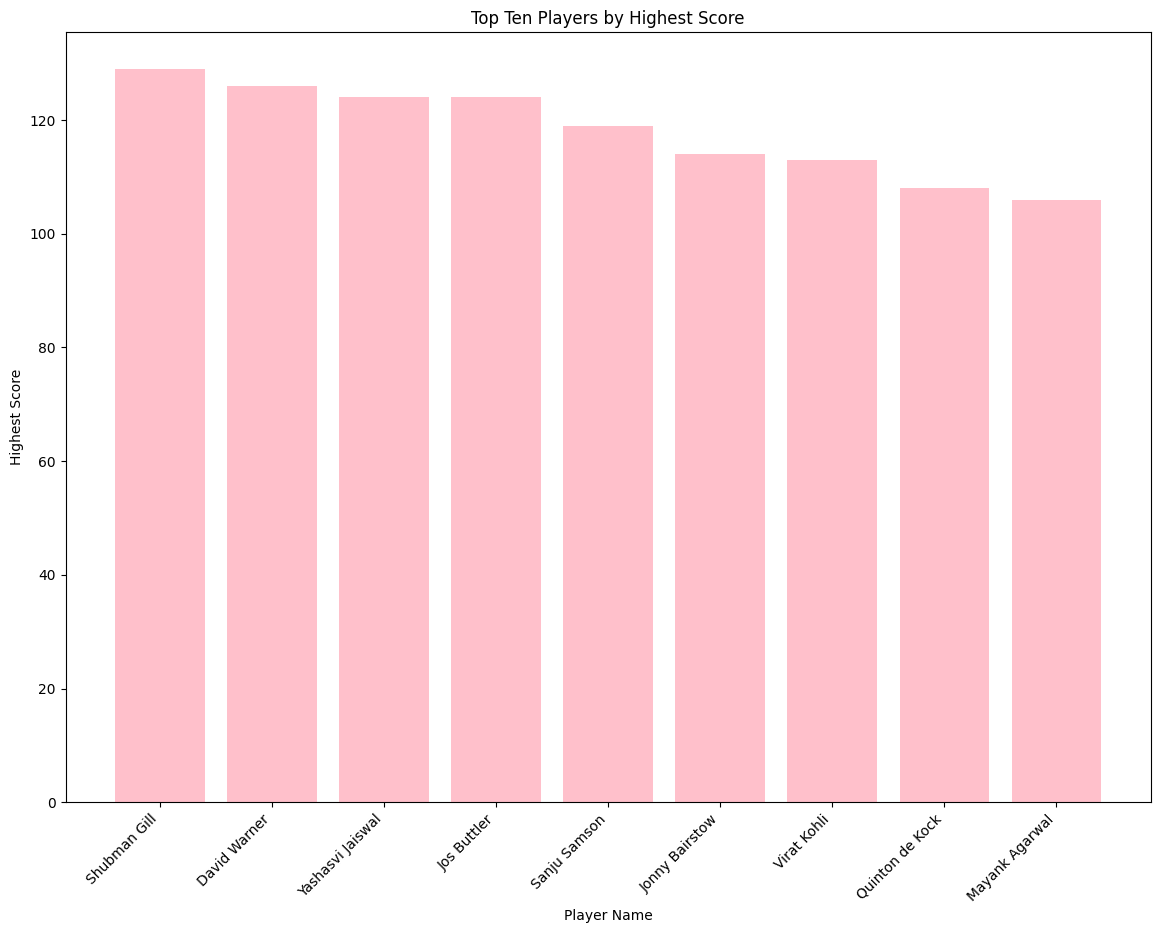

In [30]:
# Sort the DataFrame by 'Highest_Score' column in descending order
data_sorted = player_ipl.sort_values(by='Highest_Score', ascending=False)

# Select the top ten players with the highest scores
top_ten_players = data_sorted.head(10)

# Visualize Highest Score by the top ten players
plt.figure(figsize=(14, 10))
plt.bar(top_ten_players['Player_Name'], top_ten_players['Highest_Score'], color='pink')
plt.xlabel('Player Name')
plt.ylabel('Highest Score')
plt.title('Top Ten Players by Highest Score')
plt.xticks(rotation=45, ha='right')  
plt.show()


##### The bar chart provides a clear and visual representation of the top ten players based on their highest individual scores, making it easy to compare and analyze their performance.

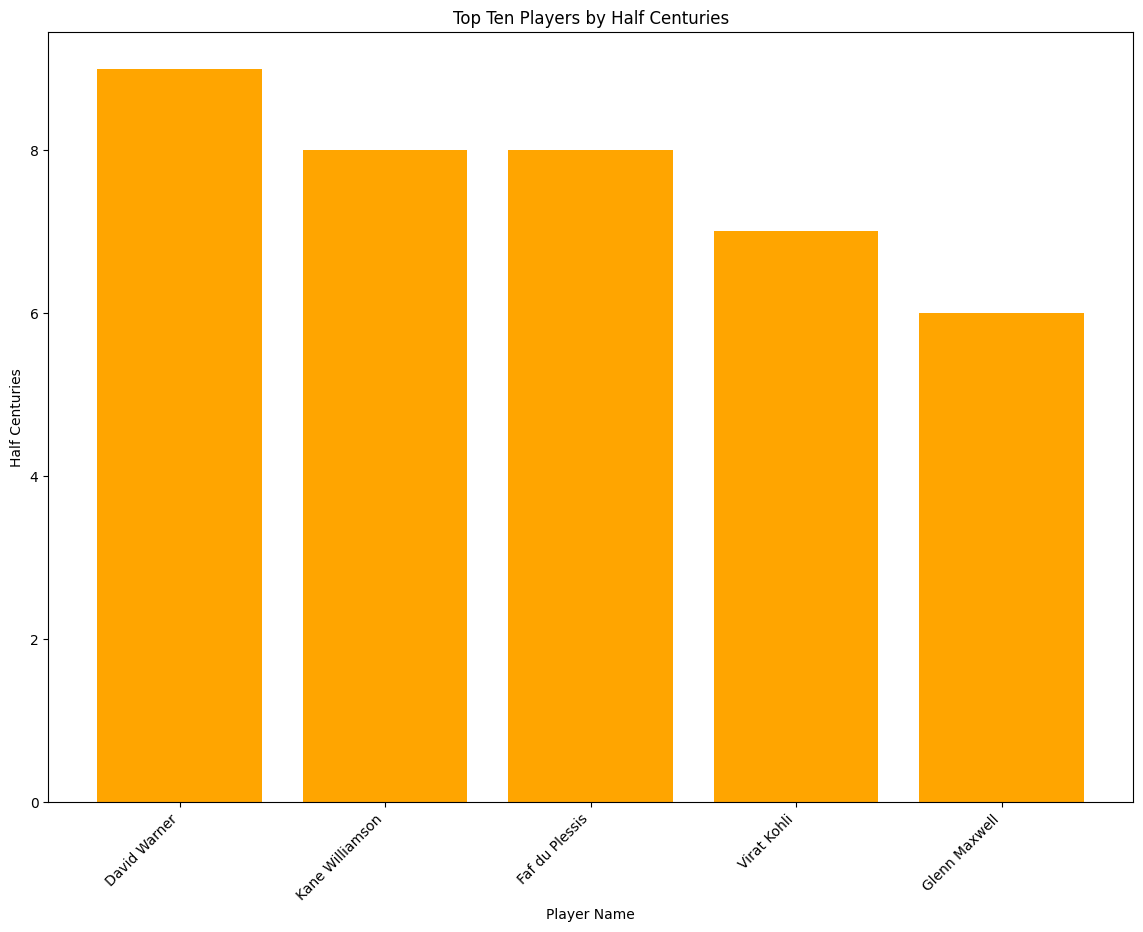

In [31]:
# Convert 'Half_Centuries' column to numeric type
player_ipl['Half_Centuries'] = pd.to_numeric(player_ipl['Half_Centuries'], errors='coerce')

# Sort the DataFrame by 'Half_Centuries' column in descending order
data_sorted = player_ipl.sort_values(by='Half_Centuries', ascending=False)

# Select the top ten players with the most half centuries
top_ten_players = data_sorted.head(10)

# Visualize Half Centuries by the top ten players
plt.figure(figsize=(14, 10))
plt.bar(top_ten_players['Player_Name'], top_ten_players['Half_Centuries'], color='orange')
plt.xlabel('Player Name')
plt.ylabel('Half Centuries')
plt.title('Top Ten Players by Half Centuries')
plt.xticks(rotation=45, ha='right')  
plt.show()

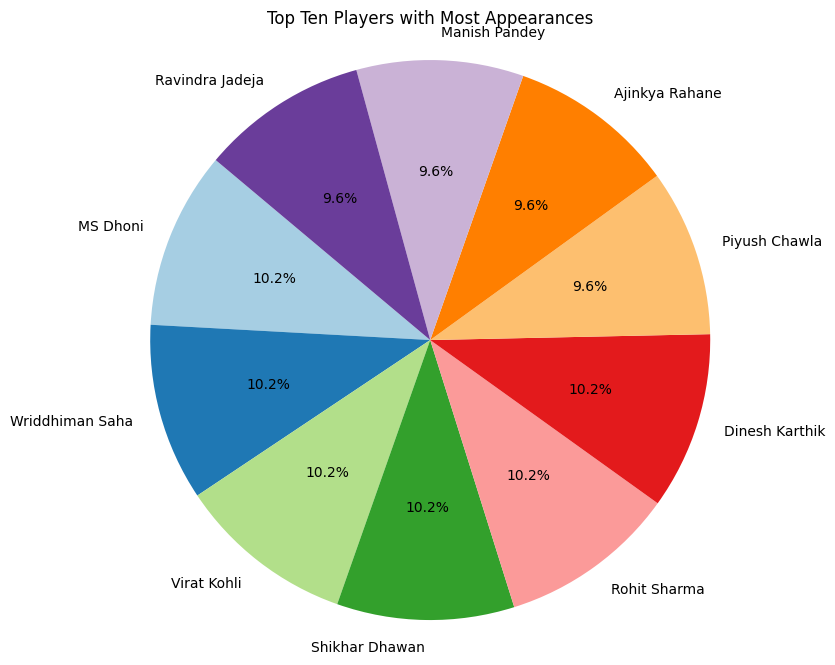

In [32]:
player_appearances = player_ipl.groupby('Player_Name')['Year'].count().sort_values(ascending=False)
top_ten_players = player_appearances.head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_ten_players.values, labels=top_ten_players.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Top Ten Players with Most Appearances')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

##### Overall, the pie chart is an effective way to visualize the distribution and relative frequency of player appearances, making it easy to see who is or was the most frequent players are at a glance.

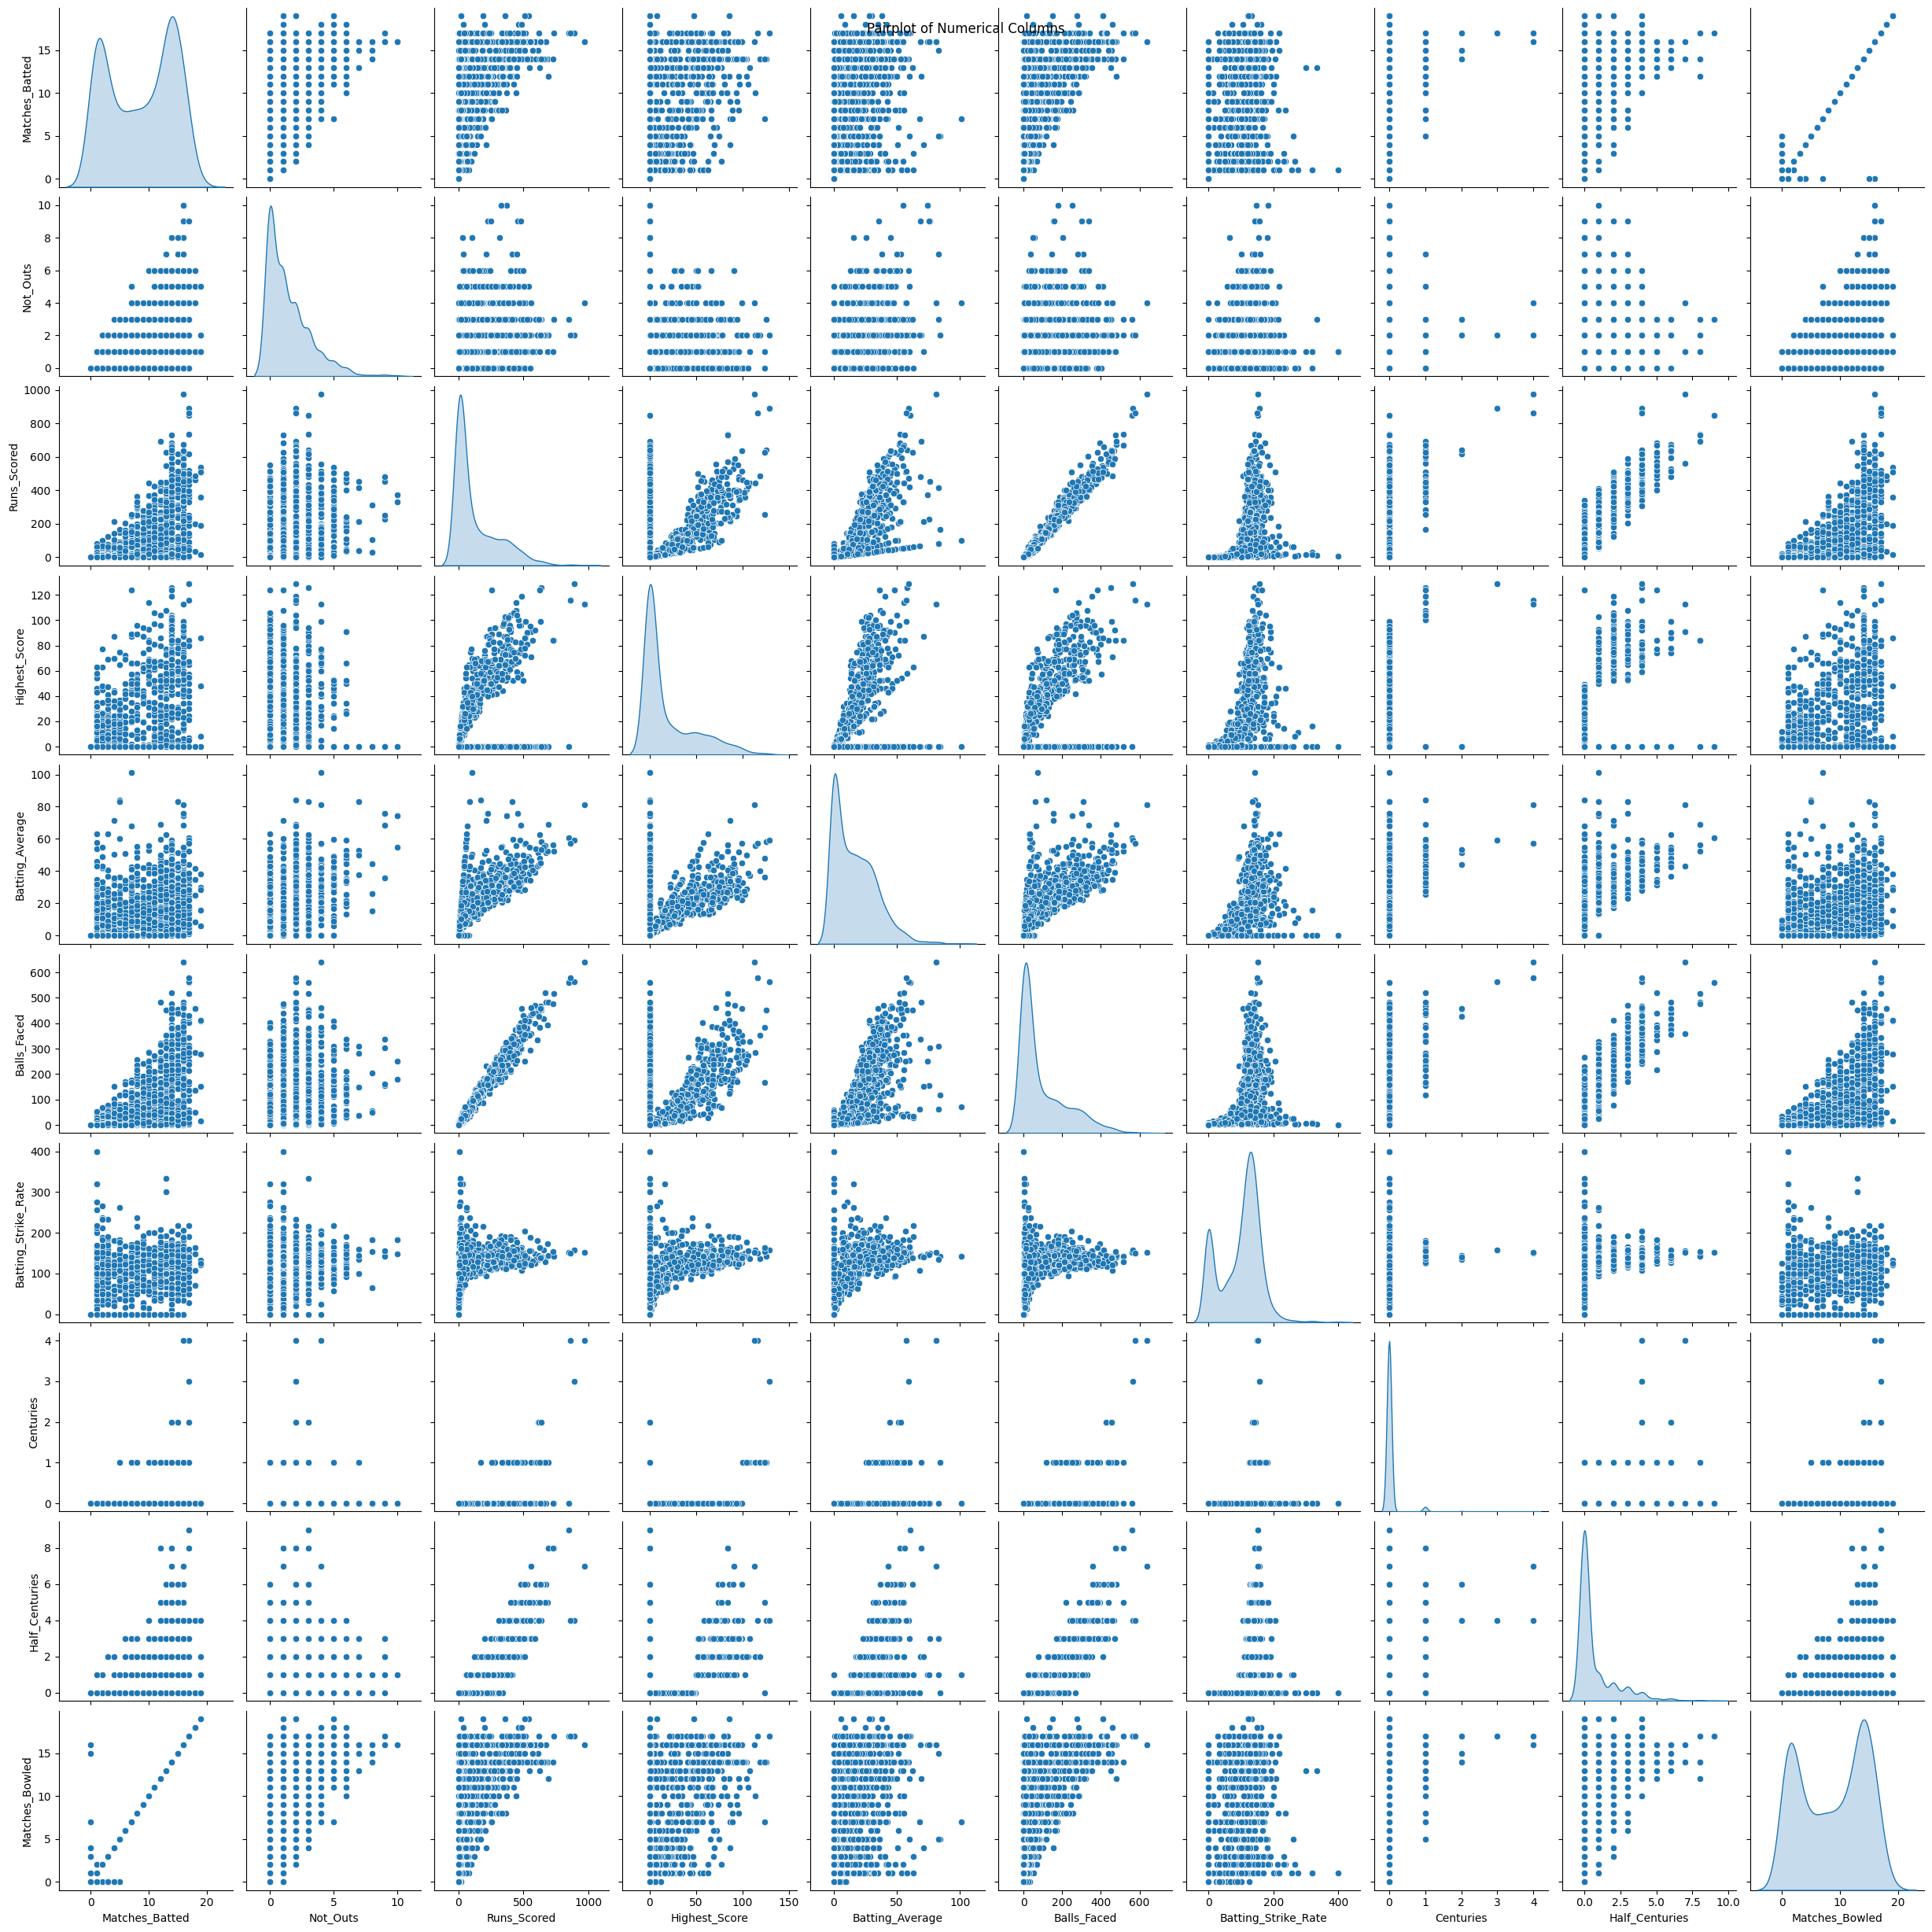

In [33]:
sns.pairplot(player_ipl,diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

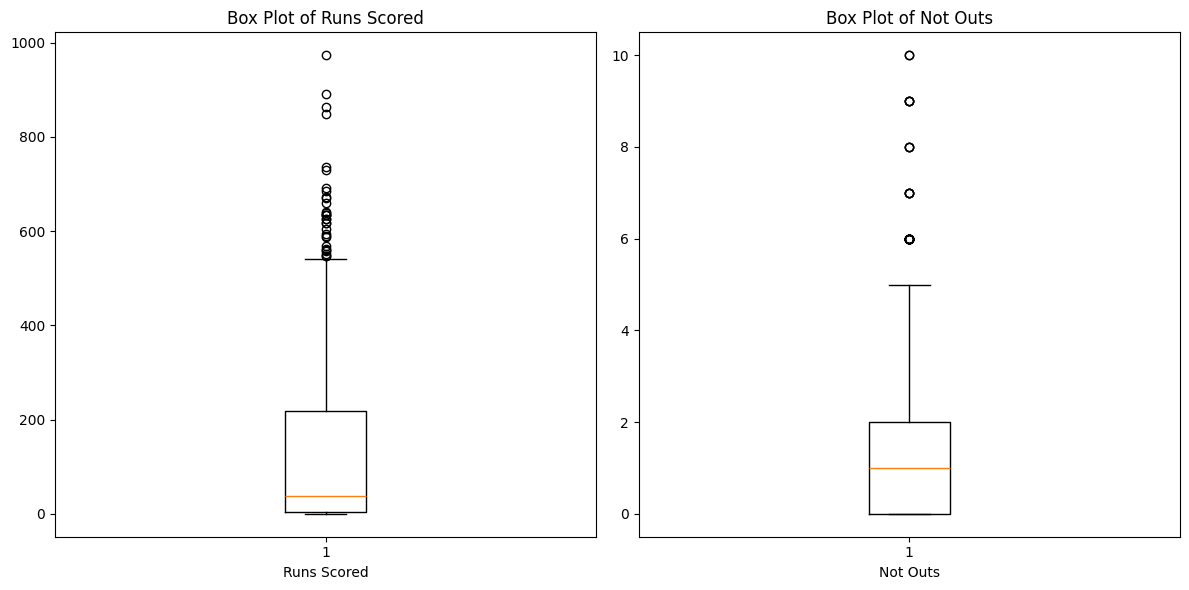

In [34]:
# Create box plots for 'Win by run' and 'Win by wicket'
plt.figure(figsize=(12, 6))

# Box plot for 'Win by runs'
plt.subplot(1, 2, 1)
plt.boxplot(player_ipl['Runs_Scored'].dropna())
plt.title('Box Plot of Runs Scored')
plt.xlabel('Runs Scored')

# Box plot for 'Win by wickets'
plt.subplot(1, 2, 2)
plt.boxplot(player_ipl['Not_Outs'].dropna())
plt.title('Box Plot of Not Outs')
plt.xlabel('Not Outs')

plt.tight_layout()
plt.show()

####  Feature Selection & Feature Engineering

In [35]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = player_ipl.select_dtypes(include=["object", "category"]).columns

# Convert all entries in categorical columns to strings
for col in categorical_columns:
    player_ipl[col] = player_ipl[col].astype(str)

# Handle missing values by filling them (you can also drop or handle them differently)
player_ipl[categorical_columns] = player_ipl[categorical_columns].fillna('Missing')

label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    player_ipl[col] = label_encoder.fit_transform(player_ipl[col])

# Display the encoded DataFrame
print(player_ipl.head())
for col in categorical_columns:
    player_ipl[col] = player_ipl[col].astype(str)
    player_ipl[categorical_columns] = player_ipl[categorical_columns].fillna('Missing')
    label_encoder = LabelEncoder()
for col in categorical_columns:
    player_ipl[col] = label_encoder.fit_transform(player_ipl[col])
print(player_ipl.head()) 
    
    

   Year  Player_Name  Matches_Batted  Not_Outs  Runs_Scored  Highest_Score  \
0    17          175             2.0       0.0         61.0           46.0   
1    16          175            16.0       1.0        590.0           92.0   
2    15          175            14.0       0.0        368.0           99.0   
3    14          175            16.0       2.0        635.0            0.0   
4    13          175             6.0       2.0        204.0           72.0   

   Batting_Average  Balls_Faced  Batting_Strike_Rate  Centuries  ...  \
0            30.50         51.0               119.61        0.0  ...   
1            42.14        400.0               147.50        0.0  ...   
2            26.29        291.0               126.46        0.0  ...   
3            45.35        466.0               136.26        1.0  ...   
4            51.00        169.0               120.71        0.0  ...   

   Matches_Bowled  Balls_Bowled  Runs_Conceded  Wickets_Taken  \
0             2.0             0  

#### Splitting Data

In [36]:
# Display the first few rows of the dataset
print(player_ipl.head())

# List of numerical columns to scale
numerical_cols = ['Runs_Scored', 'Year', 'Batting_Average']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
player_ipl[numerical_cols] = scaler.fit_transform(player_ipl[numerical_cols])


X = player_ipl.drop('Runs_Scored', axis=1)
y = player_ipl['Runs_Scored']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Display the first few rows of the training set
print("Training Data:")
print(X_train.head())
print(y_train.head())

   Year  Player_Name  Matches_Batted  Not_Outs  Runs_Scored  Highest_Score  \
0     9           85             2.0       0.0         61.0           46.0   
1     8           85            16.0       1.0        590.0           92.0   
2     7           85            14.0       0.0        368.0           99.0   
3     6           85            16.0       2.0        635.0            0.0   
4     5           85             6.0       2.0        204.0           72.0   

   Batting_Average  Balls_Faced  Batting_Strike_Rate  Centuries  ...  \
0            30.50         51.0               119.61        0.0  ...   
1            42.14        400.0               147.50        0.0  ...   
2            26.29        291.0               126.46        0.0  ...   
3            45.35        466.0               136.26        1.0  ...   
4            51.00        169.0               120.71        0.0  ...   

   Matches_Bowled  Balls_Bowled  Runs_Conceded  Wickets_Taken  \
0             2.0             0  

Balls_Faced            0.070328
Batting_Strike_Rate    0.065123
Runs_Scored            0.064713
Year                   0.063422
Batting_Average        0.060983
Catches_Taken          0.054693
Matches_Batted         0.052792
Matches_Bowled         0.050574
Economy_Rate           0.049738
Fours                  0.048703
Best_Bowling_Match     0.048693
Runs_Conceded          0.047368
Highest_Score          0.045146
Balls_Bowled           0.043267
Not_Outs               0.043210
Sixes                  0.042992
Bowling_Average        0.036213
Bowling_Strike_Rate    0.035525
Wickets_Taken          0.032786
Half_Centuries         0.020351
Stumpings              0.012139
Four_Wicket_Hauls      0.006230
Centuries              0.002819
Five_Wicket_Hauls      0.002194
dtype: float64


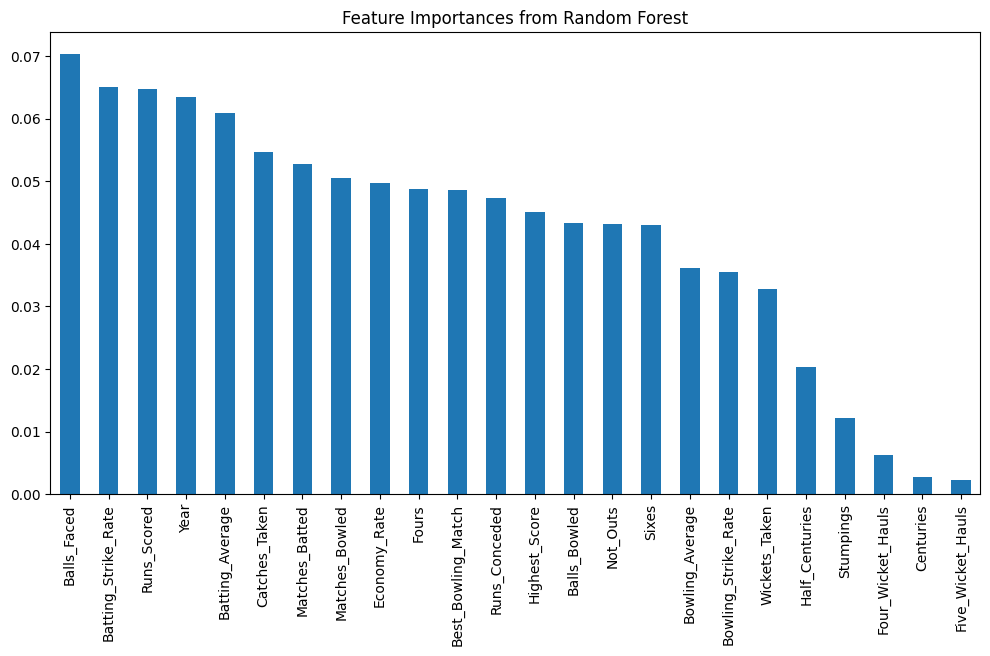

Random Forest Accuracy: 0.0824
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          16       0.20      0.50      0.29         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00    

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into features and target variable
X = player_ipl.drop('Player_Name', axis=1)
y = player_ipl['Player_Name']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances from Random Forest')
plt.show()

# Make predictions and evaluate
y_pred = rf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))


####  Build the ML Model:

In [38]:
model= {
    'Linear Regression': LinearRegression()
}
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print()

Mean Squared Error: 5194.2888415005245
R-squared: -0.01561864739712493



In [39]:
from sklearn.linear_model import LogisticRegression

# Define your target variable
# Let's say if a player has scored above the median runs scored, we label them as 'High Scorer' (1), otherwise 'Low Scorer' (0)
median_runs_scored = player_ipl['Runs_Scored'].median()
player_ipl['Runs_Scored'] = (player_ipl['Runs_Scored'] > median_runs_scored).astype(int)

# Split the dataset into features and target variable
X = player_ipl.drop(['Runs_Scored'], axis=1)
y = player_ipl['Runs_Scored']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9872340425531915
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       124
           1       0.99      0.98      0.99       111

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



In [40]:
#SVM
# Split dataset into features and target variable
X = player_ipl.drop('Runs_Scored', axis=1)
y = player_ipl['Runs_Scored']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the SVR model
svm_model = SVR(kernel='linear', C=1.0)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:",r2)

Mean Squared Error: 0.05352139792470183
R^2 Score: 0.7852572507707309


In [41]:
# KNN Model
# Convert target variable to categorical for classification
y = pd.cut(y, bins=[-1, 0.25, 0.5, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

# Split data again with new target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

print("KNN Classification Report:")
print(classification_report(y_test,y_pred))

KNN Accuracy: 0.9319148936170213
KNN Classification Report:
              precision    recall  f1-score   support

         low       0.90      0.98      0.94       124
   very_high       0.98      0.87      0.92       111

    accuracy                           0.93       235
   macro avg       0.94      0.93      0.93       235
weighted avg       0.94      0.93      0.93       235



In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb}")
print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting - Accuracy: 0.9829787234042553
Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

         low       0.98      0.98      0.98       124
   very_high       0.98      0.98      0.98       111

    accuracy                           0.98       235
   macro avg       0.98      0.98      0.98       235
weighted avg       0.98      0.98      0.98       235



In [43]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost - Accuracy: {accuracy_adaboost}")
print("AdaBoost - Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

AdaBoost - Accuracy: 0.9872340425531915
AdaBoost - Classification Report:
              precision    recall  f1-score   support

         low       0.99      0.98      0.99       124
   very_high       0.98      0.99      0.99       111

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare Data 
X = player_ipl.drop('Runs_Scored', axis=1)  
y = player_ipl['Runs_Scored']              

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate and Train Random Forest Regressor Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 4. Evaluate the Model
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.011732765957446809
R-squared (Random Forest): 0.9529248764893926


In [45]:
from sklearn.svm import SVR

# Instantiate SVR
svr_regressor = SVR()

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_regressor.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R-squared (SVR): {r2_svr}')

Mean Squared Error (SVR): 0.04229734725480615
R-squared (SVR): 0.8302912669175625


In [46]:
from sklearn.neural_network import MLPRegressor

# Instantiate MLP Regressor
mlp_regressor = MLPRegressor(random_state=42)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_pred_mlp_reg = mlp_regressor.predict(X_test)

# Evaluate the model
mse_mlp_reg = mean_squared_error(y_test, y_pred_mlp_reg)
r2_mlp_reg = r2_score(y_test, y_pred_mlp_reg)

print(f'Mean Squared Error (MLP Regressor): {mse_mlp_reg}')
print(f'R-squared (MLP Regressor): {r2_mlp_reg}')


Mean Squared Error (MLP Regressor): 3.4491574838939227
R-squared (MLP Regressor): -12.838980096486623


In [47]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.23134692114809272


In [48]:
# Making predictions
y_pred = log_reg.predict(X_test)

# Calculating Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9872340425531915


In [49]:
from sklearn.metrics import precision_score
# Calculating Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class tasks

print(f"Precision: {precision}")

Precision: 0.9872634429400386


In [50]:
from sklearn.metrics import recall_score
# Calculating Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class tasks

print(f"Recall: {recall}")

Recall: 0.9872340425531915


In [51]:
from sklearn.metrics import f1_score
# Calculating F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class tasks

print(f"F1-Score: {f1}")

F1-Score: 0.9872307947492289


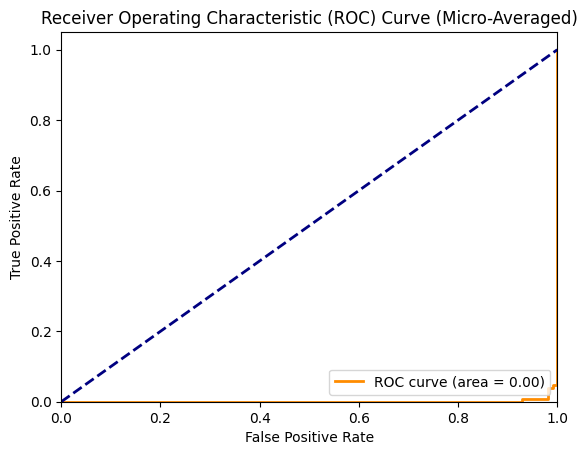

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Determine the unique classes in your target variable
classes = y.unique()

# Binarize the output
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Learn to predict each class against the other
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plotting the micro-average ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Averaged)')
plt.legend(loc="lower right")
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty (L1 or L2 regularization)
    'solver': ['liblinear']                # Optimization algorithm
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy Score: 0.9914893617021276


In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Split Data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Unseen Data: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score on Unseen Data: 0.9914893617021276
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99       111

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



# Data Preprocessing: 
#### The code starts by loading the cricket data from a CSV file and preprocesses it by converting columns to numeric types, handling missing values, and detecting/removing outliers using the Interquartile Range (IQR) method.

# Exploratory Data Analysis (EDA): 
#### It includes visualizations such as histograms, scatter plots, bar plots, and pair plots to understand the distribution and relationships between different features, such as runs scored, batting average, and highest score.


# Feature Engineering: 
#### It involves encoding categorical variables using Label Encoding and scaling numerical features using MinMaxScaler.

# Model Building and Evaluation: 
#### Several machine learning models are trained and evaluated for predicting runs scored or classifying players based on their performance. Models include Linear Regression, Random Forest Classifier, Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Gradient Boosting, and AdaBoost.


# Model Performance Evaluation:
#### Model performance is assessed using metrics such as Mean Squared Error (MSE), R-squared, Accuracy, Precision, Recall, F1-Score, and Receiver Operating Characteristic (ROC) Curve.

# Conclusion:
#### The analysis provides insights into IPL player performance and suggests that various factors such as batting average, balls faced, and centuries scored can influence runs scored. Machine learning models can predict runs scored or classify players based on performance with reasonable accuracy. Further analysis could explore additional features or refine existing models for better predictions.